In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
%matplotlib inline

In [4]:
test = pd.read_csv("titanic/test.csv")
train = pd.read_csv("titanic/train.csv")

In [32]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.75,NaN,Q


In [33]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [34]:
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [36]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


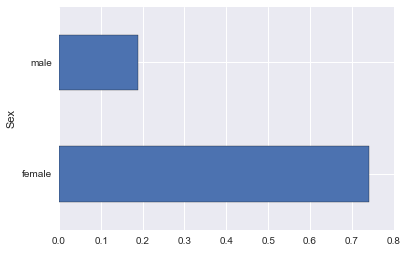

In [37]:
sex_table = pd.pivot_table(train, index='Sex', values='Survived')
sex_table.plot(kind='barh')


Survived
Sex    Age_Range Pclass          
female Adult     1       0.976190
                 2       0.909091
                 3       0.455696
       Child     1       0.000000
                 2       1.000000
                 3       0.478261
       Unknown   1       1.000000
                 2       1.000000
                 3       0.595238
male   Adult     1       0.377551
                 2       0.066667
                 3       0.127193
       Child     1       1.000000
                 2       1.000000
                 3       0.360000
       Unknown   1       0.238095
                 2       0.222222
                 3       0.095745

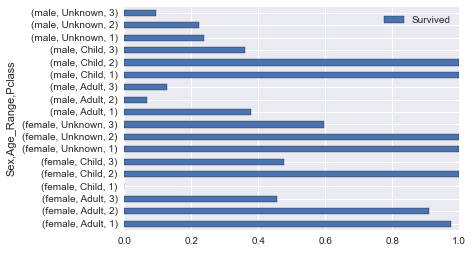

In [33]:
def age_range(age):
    if str(age) == 'nan':
        return 'Unknown'
    elif age >= 13:
        return 'Adult'
    else:
        return 'Child'
    
    
train['Age_Range'] = train['Age'].map(age_range)

survivor_table = pd.pivot_table(train, index=['Sex', 'Age_Range', 'Pclass'], values=['Survived'])
survivor_table.plot(kind='barh')
survivor_table


In [71]:
tx = train[(train.Age <= 13) & (train.Sex == 'male')] 
len(tx)

37

Survived
Sex    Age_Range Pclass          
female Adult     1       0.976190
                 2       0.909091
                 3       0.455696
       Child     1       0.000000
                 2       1.000000
                 3       0.478261
       Unknown   1       1.000000
                 2       1.000000
                 3       0.595238
male   Adult     1       0.377551
                 2       0.066667
                 3       0.127193
       Child     1       1.000000
                 2       1.000000
                 3       0.360000
       Unknown   1       0.238095
                 2       0.222222
                 3       0.095745

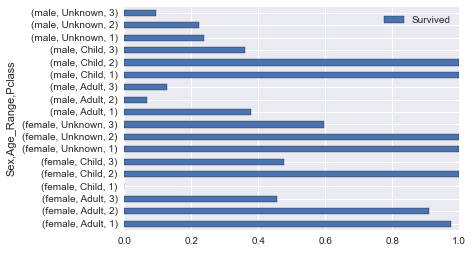

In [75]:
pclass_table = pd.pivot_table(train, index=['Sex', 'Age_Range', 'Pclass'], values=["Survived"])
pclass_table.plot(kind='barh')
pclass_table

In [84]:
test = pd.read_csv("titanic/test.csv")
test['Survived'] = 0
test.loc[test['Sex'] == 'female', 'Survived'] = 1
test = test[['PassengerId', 'Survived']]
#test.to_csv("titanic/malesdie.csv", index=False)
test.head()  # this was 77% accurate

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [23]:
new_test = pd.read_csv("titanic/test.csv")
new_test['Survived'] = 0
new_test.loc[(new_test['Sex'] == 'male') & (new_test['Age'] <= 13), "Survived"] = 1
new_test.loc[new_test['Sex'] == 'female', 'Survived'] = 1
new_test = new_test[['PassengerId', 'Survived']]
new_test.to_csv("titanic/womanandchildren1.csv", index=False)

# test didnt improve enough to matter 

In [35]:
n_test = pd.read_csv("titanic/test.csv")
n_test['Survived'] = 0
n_test.loc[(n_test['Sex'] == 'male') & (n_test['Age'] <= 13) & (n_test['Pclass'] < 3), "Survived"] = 1
n_test.loc[(n_test['Sex'] == 'female') & (n_test['Pclass'] < 3), 'Survived'] = 1
n_test = n_test[['PassengerId', 'Survived']]
n_test.to_csv("titanic/richMenWomanChildren.csv", index=False)


